<h1>Import data frames and libraries</h1>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
# %matplotlib inline
import os
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import torch

In [2]:
df_euclid_without_z = pd.read_csv('/HDD-1T/KNN/df_euclid_without_z.csv')
df_euclid = pd.read_csv('/HDD-1T/KNN/df_euclid.csv')
df_relative_vectors = pd.read_csv('/HDD-1T/KNN/df_relative_vectors.csv')

In [90]:
df_euclid_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_asl.csv')
df_euclid_without_z_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_without_z_asl.csv')
df_relative_vectors_asl = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_relative_vectors_asl.csv')

In [115]:
alpha_dict_asl = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E', 6: 'F', 7: 'G', 8: 'H',
    9: 'I', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q',
    17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y'
}

<h1>KNN Implementation</h1>

In [3]:
def knn(sample, X, y, k_neighbors):
    # unsqueeze ==> 1D tensor transformed into a 2D tensor with a single row (x,) ==> (1,x)
    sample = sample.unsqueeze(1).T
    # Compute the distance with the train set
    dist = (X - sample).pow(2).sum(axis=1).sqrt()
    
    # Sort the distances
    _, indices = torch.sort(dist)
    y = y[indices]
    
    # Get the Kth most similar samples and return the predominant class
    return y[:k_neighbors].bincount().argmax().item()

In [4]:
def train_knn(X_train, X_test, y_train, y_test, k_neighbors=1):
    
    # Allocate space for the prediction
    y_pred_test = np.zeros(y_test.shape, dtype=np.uint8)
    X_train_c = X_train.clone()
    
    # Predict on each sample of the train and test
    for i in range(X_test.shape[0]):
        y_pred_test[i] = knn(X_test[i], X_train, y_train, k_neighbors=k_neighbors)
    y_pred_test = torch.from_numpy(y_pred_test).float()
    
    return y_pred_test

<h1>Cross Testing Method</h1>

<h2>Test the ASL Dataset on the training data from the Augmented (Custom) Dataset</h2>

In [82]:
df_euclid_copy = df_euclid.copy() #my dataset

In [83]:
df_euclid_right = df_euclid_copy[df_euclid_copy['Label']%2 == 0]

In [84]:
df_euclid_right.head()

,Label,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
300,40,0.057178,0.111435,0.149739,0.174371,0.164095,0.227665,0.265091,0.295687,0.154353,...,0.037881,0.037896,0.025665,0.032698,0.022472,0.023875,0.035912,0.024526,0.045034,0.021156
301,40,0.060508,0.122894,0.172813,0.206133,0.179015,0.259497,0.307420,0.347511,0.168389,...,0.039414,0.037042,0.027076,0.042606,0.032218,0.028679,0.038768,0.028956,0.053173,0.025308
302,40,0.041655,0.090561,0.127673,0.147492,0.121662,0.181576,0.224357,0.257797,0.113451,...,0.043097,0.033904,0.015347,0.024948,0.029660,0.030758,0.034816,0.024605,0.042652,0.019776
303,40,0.046541,0.083720,0.107486,0.128256,0.151938,0.219800,0.266202,0.302812,0.147072,...,0.053181,0.034228,0.031043,0.045437,0.038405,0.034096,0.036482,0.022945,0.046120,0.024067
304,40,0.037714,0.068354,0.093576,0.106942,0.101452,0.137406,0.157326,0.171129,0.099229,...,0.048035,0.028780,0.027623,0.034961,0.022007,0.020628,0.014974,0.006562,0.015560,0.010125


In [91]:
df_euclid_without_label = df_euclid_right.copy()
df_euclid_without_label.drop(columns = ['Label'], axis = 1, inplace = True)

In [92]:
df_euclid_asl_without_label = df_euclid_asl.copy()
df_euclid_asl_without_label.drop(columns = ['Label'], axis = 1, inplace = True)

In [97]:
df_euclid_asl['Label'] = df_euclid_asl['Label'] * 2
df_euclid_asl.head()

,Label,1,2,3,4,5,6,7,8,9,...,201,202,203,204,205,206,207,208,209,210
0,20,0.107950,0.203843,0.270192,0.322981,0.280089,0.394483,0.466870,0.527463,0.254155,...,0.079087,0.092689,0.054189,0.054294,0.076280,0.053765,0.056001,0.055322,0.097866,0.044458
1,20,0.092322,0.173566,0.225164,0.257551,0.208282,0.301944,0.359846,0.408929,0.193720,...,0.083541,0.086469,0.048102,0.052425,0.067542,0.048280,0.051874,0.048322,0.089489,0.042913
2,20,0.095732,0.181383,0.242728,0.293142,0.237405,0.339178,0.404419,0.460798,0.219209,...,0.077416,0.086280,0.048228,0.051156,0.074620,0.059200,0.063820,0.054124,0.095234,0.042924
3,20,0.138442,0.260083,0.345569,0.414528,0.329907,0.476544,0.567070,0.646834,0.306927,...,0.114662,0.120066,0.071451,0.072048,0.103641,0.090625,0.099696,0.072995,0.127944,0.057034
4,20,0.129749,0.243836,0.325489,0.391909,0.315723,0.452588,0.536031,0.607261,0.287878,...,0.111701,0.119834,0.065263,0.064947,0.102646,0.088209,0.100308,0.076226,0.133657,0.059490


In [95]:
df_euclid_right['Label']

300      40
301      40
302      40
303      40
304      40
         ..
11903    48
11904    48
11905    48
11906    48
11907    48
Name: Label, Length: 5652, dtype: int64

In [98]:
df_euclid_asl['Label']

0       20
1       20
2       20
3       20
4       20
        ..
5502    48
5503    48
5504    48
5505    48
5506    48
Name: Label, Length: 5507, dtype: int64

In [99]:
df_euclid_without_label.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
300,0.057178,0.111435,0.149739,0.174371,0.164095,0.227665,0.265091,0.295687,0.154353,0.223248,...,0.037881,0.037896,0.025665,0.032698,0.022472,0.023875,0.035912,0.024526,0.045034,0.021156
301,0.060508,0.122894,0.172813,0.206133,0.179015,0.259497,0.307420,0.347511,0.168389,0.255815,...,0.039414,0.037042,0.027076,0.042606,0.032218,0.028679,0.038768,0.028956,0.053173,0.025308
302,0.041655,0.090561,0.127673,0.147492,0.121662,0.181576,0.224357,0.257797,0.113451,0.175798,...,0.043097,0.033904,0.015347,0.024948,0.029660,0.030758,0.034816,0.024605,0.042652,0.019776
303,0.046541,0.083720,0.107486,0.128256,0.151938,0.219800,0.266202,0.302812,0.147072,0.222878,...,0.053181,0.034228,0.031043,0.045437,0.038405,0.034096,0.036482,0.022945,0.046120,0.024067
304,0.037714,0.068354,0.093576,0.106942,0.101452,0.137406,0.157326,0.171129,0.099229,0.135057,...,0.048035,0.028780,0.027623,0.034961,0.022007,0.020628,0.014974,0.006562,0.015560,0.010125


In [100]:
X_custom = df_euclid_without_label.copy()

In [101]:
y_custom = df_euclid_right['Label']

In [102]:
X_test_ASL = df_euclid_asl_without_label.copy()

In [103]:
y_test_ASL = df_euclid_asl['Label']

In [104]:
print(f"X_custom type: {type(X_custom)}, shape: {X_custom.shape}")
print(f"X_test_ASL type: {type(X_test_ASL)}, shape: {X_test_ASL.shape}")
print(f"y_custom type: {type(y_custom)}, shape: {y_custom.shape}")
print(f"y_test_ASL type: {type(y_test_ASL)}, shape: {y_test_ASL.shape}")

X_custom type: <class 'pandas.core.frame.DataFrame'>, shape: (5652, 210)
X_test_ASL type: <class 'pandas.core.frame.DataFrame'>, shape: (5507, 210)
y_custom type: <class 'pandas.core.series.Series'>, shape: (5652,)
y_test_ASL type: <class 'pandas.core.series.Series'>, shape: (5507,)


In [105]:
X_custom.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
300,0.057178,0.111435,0.149739,0.174371,0.164095,0.227665,0.265091,0.295687,0.154353,0.223248,...,0.037881,0.037896,0.025665,0.032698,0.022472,0.023875,0.035912,0.024526,0.045034,0.021156
301,0.060508,0.122894,0.172813,0.206133,0.179015,0.259497,0.307420,0.347511,0.168389,0.255815,...,0.039414,0.037042,0.027076,0.042606,0.032218,0.028679,0.038768,0.028956,0.053173,0.025308
302,0.041655,0.090561,0.127673,0.147492,0.121662,0.181576,0.224357,0.257797,0.113451,0.175798,...,0.043097,0.033904,0.015347,0.024948,0.029660,0.030758,0.034816,0.024605,0.042652,0.019776
303,0.046541,0.083720,0.107486,0.128256,0.151938,0.219800,0.266202,0.302812,0.147072,0.222878,...,0.053181,0.034228,0.031043,0.045437,0.038405,0.034096,0.036482,0.022945,0.046120,0.024067
304,0.037714,0.068354,0.093576,0.106942,0.101452,0.137406,0.157326,0.171129,0.099229,0.135057,...,0.048035,0.028780,0.027623,0.034961,0.022007,0.020628,0.014974,0.006562,0.015560,0.010125


In [106]:
y_custom.head()

300    40
301    40
302    40
303    40
304    40
Name: Label, dtype: int64

In [107]:
X_test_ASL.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
0,0.107950,0.203843,0.270192,0.322981,0.280089,0.394483,0.466870,0.527463,0.254155,0.373069,...,0.079087,0.092689,0.054189,0.054294,0.076280,0.053765,0.056001,0.055322,0.097866,0.044458
1,0.092322,0.173566,0.225164,0.257551,0.208282,0.301944,0.359846,0.408929,0.193720,0.295454,...,0.083541,0.086469,0.048102,0.052425,0.067542,0.048280,0.051874,0.048322,0.089489,0.042913
2,0.095732,0.181383,0.242728,0.293142,0.237405,0.339178,0.404419,0.460798,0.219209,0.326968,...,0.077416,0.086280,0.048228,0.051156,0.074620,0.059200,0.063820,0.054124,0.095234,0.042924
3,0.138442,0.260083,0.345569,0.414528,0.329907,0.476544,0.567070,0.646834,0.306927,0.462793,...,0.114662,0.120066,0.071451,0.072048,0.103641,0.090625,0.099696,0.072995,0.127944,0.057034
4,0.129749,0.243836,0.325489,0.391909,0.315723,0.452588,0.536031,0.607261,0.287878,0.428705,...,0.111701,0.119834,0.065263,0.064947,0.102646,0.088209,0.100308,0.076226,0.133657,0.059490


In [108]:
y_test_ASL.head()

0    20
1    20
2    20
3    20
4    20
Name: Label, dtype: int64

In [109]:
scaler = StandardScaler() 
X_custom = scaler.fit_transform(X_custom)
X_test_ASL = scaler.transform(X_test_ASL)

In [110]:
X_custom = torch.from_numpy(X_custom)
X_test_ASL = torch.from_numpy(X_test_ASL)
y_custom = torch.tensor(y_custom.to_numpy())
y_test_ASL = torch.tensor(y_test_ASL.to_numpy()) 

In [111]:
print(type(X_custom))
print(type(X_test_ASL))
print(type(y_custom))
print(type(y_test_ASL))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [112]:
pred_test_euclid_asl = train_knn(X_custom, X_test_ASL, y_custom, y_test_ASL, k_neighbors=1)
print(classification_report(y_test_ASL, pred_test_euclid_asl))

              precision    recall  f1-score   support

           2       0.69      1.00      0.81       217
           4       0.77      0.85      0.81       202
           6       0.09      0.06      0.07       199
           8       0.03      0.01      0.01       257
          10       0.81      0.86      0.84       228
          12       0.59      0.73      0.65       290
          14       0.04      0.03      0.04       250
          16       0.13      0.04      0.06       240
          18       1.00      0.72      0.83       246
          20       0.43      0.63      0.51       265
          22       0.39      1.00      0.57       245
          24       0.00      0.00      0.00       163
          26       0.00      0.00      0.00       131
          28       0.52      0.75      0.61       226
          30       0.01      0.01      0.01       200
          32       0.07      0.02      0.03       212
          34       0.88      0.06      0.10       251
          36       0.67    

In [114]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_asl = confusion_matrix(y_test_ASL, pred_test_euclid_asl)

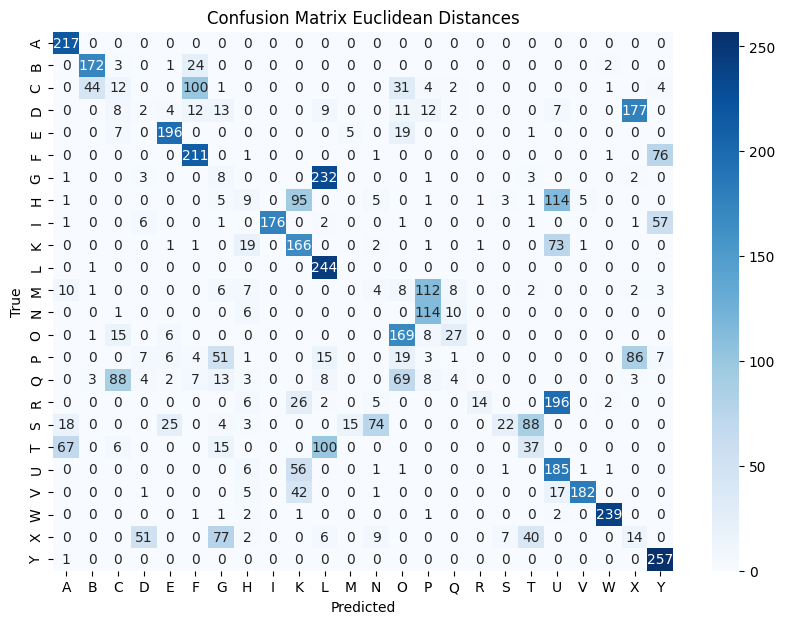

In [117]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_euclid_asl, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances')
plt.savefig('Confusion_Matrix_Euclidean_Distances_TEST_ASL_TRAIN_AUG.png')
plt.show()

<h2>Test the Augmented (Custom) Dataset on the training data from the ASL Dataset</h2>

In [119]:
X_test_custom = df_euclid_without_label.copy()
X_train_asl = df_euclid_asl_without_label.copy()
y_test_custom = df_euclid_right['Label']
y_train_asl = df_euclid_asl['Label']

In [120]:
X_test_custom.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
300,0.057178,0.111435,0.149739,0.174371,0.164095,0.227665,0.265091,0.295687,0.154353,0.223248,...,0.037881,0.037896,0.025665,0.032698,0.022472,0.023875,0.035912,0.024526,0.045034,0.021156
301,0.060508,0.122894,0.172813,0.206133,0.179015,0.259497,0.307420,0.347511,0.168389,0.255815,...,0.039414,0.037042,0.027076,0.042606,0.032218,0.028679,0.038768,0.028956,0.053173,0.025308
302,0.041655,0.090561,0.127673,0.147492,0.121662,0.181576,0.224357,0.257797,0.113451,0.175798,...,0.043097,0.033904,0.015347,0.024948,0.029660,0.030758,0.034816,0.024605,0.042652,0.019776
303,0.046541,0.083720,0.107486,0.128256,0.151938,0.219800,0.266202,0.302812,0.147072,0.222878,...,0.053181,0.034228,0.031043,0.045437,0.038405,0.034096,0.036482,0.022945,0.046120,0.024067
304,0.037714,0.068354,0.093576,0.106942,0.101452,0.137406,0.157326,0.171129,0.099229,0.135057,...,0.048035,0.028780,0.027623,0.034961,0.022007,0.020628,0.014974,0.006562,0.015560,0.010125


In [121]:
y_test_custom.head()

300    40
301    40
302    40
303    40
304    40
Name: Label, dtype: int64

In [122]:
X_train_asl.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
0,0.107950,0.203843,0.270192,0.322981,0.280089,0.394483,0.466870,0.527463,0.254155,0.373069,...,0.079087,0.092689,0.054189,0.054294,0.076280,0.053765,0.056001,0.055322,0.097866,0.044458
1,0.092322,0.173566,0.225164,0.257551,0.208282,0.301944,0.359846,0.408929,0.193720,0.295454,...,0.083541,0.086469,0.048102,0.052425,0.067542,0.048280,0.051874,0.048322,0.089489,0.042913
2,0.095732,0.181383,0.242728,0.293142,0.237405,0.339178,0.404419,0.460798,0.219209,0.326968,...,0.077416,0.086280,0.048228,0.051156,0.074620,0.059200,0.063820,0.054124,0.095234,0.042924
3,0.138442,0.260083,0.345569,0.414528,0.329907,0.476544,0.567070,0.646834,0.306927,0.462793,...,0.114662,0.120066,0.071451,0.072048,0.103641,0.090625,0.099696,0.072995,0.127944,0.057034
4,0.129749,0.243836,0.325489,0.391909,0.315723,0.452588,0.536031,0.607261,0.287878,0.428705,...,0.111701,0.119834,0.065263,0.064947,0.102646,0.088209,0.100308,0.076226,0.133657,0.059490


In [123]:
y_train_asl.head()

0    20
1    20
2    20
3    20
4    20
Name: Label, dtype: int64

In [124]:
print(f"X_test_custom type: {type(X_test_custom)}, shape: {X_test_custom.shape}")
print(f"X_train_asl type: {type(X_train_asl)}, shape: {X_train_asl.shape}")
print(f"y_test_custom type: {type(y_test_custom)}, shape: {y_test_custom.shape}")
print(f"y_train_asl type: {type(y_train_asl)}, shape: {y_train_asl.shape}")

X_test_custom type: <class 'pandas.core.frame.DataFrame'>, shape: (5652, 210)
X_train_asl type: <class 'pandas.core.frame.DataFrame'>, shape: (5507, 210)
y_test_custom type: <class 'pandas.core.series.Series'>, shape: (5652,)
y_train_asl type: <class 'pandas.core.series.Series'>, shape: (5507,)


In [125]:
scaler = StandardScaler() 
X_test_custom = scaler.fit_transform(X_test_custom)
X_train_asl = scaler.transform(X_train_asl)

In [126]:
X_test_custom = torch.from_numpy(X_test_custom)
X_train_asl = torch.from_numpy(X_train_asl)
y_test_custom = torch.tensor(y_test_custom.to_numpy())
y_train_asl = torch.tensor(y_train_asl.to_numpy()) 

In [127]:
print(type(X_test_custom))
print(type(X_train_asl))
print(type(y_test_custom))
print(type(y_train_asl))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [128]:
pred_test_euclid_custom = train_knn(X_train_asl, X_test_custom, y_train_asl, y_test_custom, k_neighbors=1)
print(classification_report(y_test_custom, pred_test_euclid_custom))

              precision    recall  f1-score   support

           2       0.88      0.62      0.73       287
           4       0.43      0.68      0.53       297
           6       0.02      0.02      0.02       297
           8       0.00      0.00      0.00       300
          10       0.59      0.39      0.47       285
          12       0.02      0.06      0.03       288
          14       0.02      0.01      0.01       182
          16       0.16      0.52      0.25       212
          18       0.73      0.42      0.54       208
          20       0.02      0.02      0.02       168
          22       1.00      0.03      0.06       247
          24       0.00      0.00      0.00       213
          26       0.00      0.00      0.00       275
          28       0.13      0.06      0.08       248
          30       0.11      0.34      0.17       233
          32       0.07      0.04      0.05       216
          34       0.04      0.04      0.04       178
          36       0.13    

In [129]:
from sklearn.metrics import confusion_matrix
conf_mat_euclid_custom = confusion_matrix(y_test_custom, pred_test_euclid_custom)

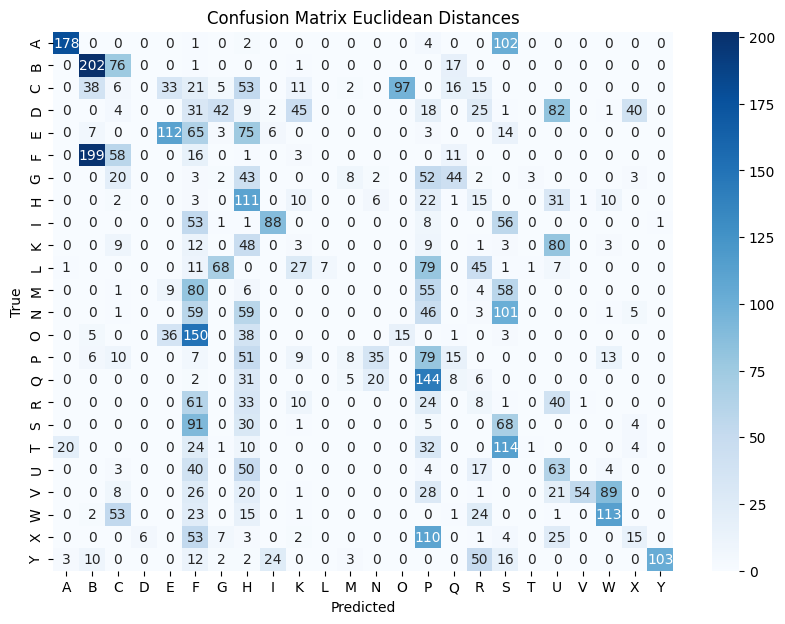

In [137]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_mat_euclid_custom, annot=True, fmt='d', cmap='Blues', xticklabels = alpha_dict_asl.values(), yticklabels = alpha_dict_asl.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Euclidean Distances')
plt.savefig('Confusion_Matrix_Euclidean_Distances_TEST_AUG_TRAIN_ASL.png')
plt.show()

<h2>Test the remaining ASL Dataset on the training data from the selected ASL Dataset </h2>

In [131]:
df_euclid_asl_final = pd.read_csv('/HDD-1T/KNN_asl_alphabet_train/df_euclid_asl.csv')

In [132]:
df_euclid_asl_final_without_label = df_euclid_asl_final.copy()
df_euclid_asl_final_without_label.drop(columns = ['Label'], axis = 1, inplace = True)

In [133]:
X_ASL = df_euclid_asl_without_label.copy()
y_ASL = df_euclid_asl_final['Label']

In [134]:
X_ASL.head()

,1,2,3,4,5,6,7,8,9,10,...,201,202,203,204,205,206,207,208,209,210
0,0.107950,0.203843,0.270192,0.322981,0.280089,0.394483,0.466870,0.527463,0.254155,0.373069,...,0.079087,0.092689,0.054189,0.054294,0.076280,0.053765,0.056001,0.055322,0.097866,0.044458
1,0.092322,0.173566,0.225164,0.257551,0.208282,0.301944,0.359846,0.408929,0.193720,0.295454,...,0.083541,0.086469,0.048102,0.052425,0.067542,0.048280,0.051874,0.048322,0.089489,0.042913
2,0.095732,0.181383,0.242728,0.293142,0.237405,0.339178,0.404419,0.460798,0.219209,0.326968,...,0.077416,0.086280,0.048228,0.051156,0.074620,0.059200,0.063820,0.054124,0.095234,0.042924
3,0.138442,0.260083,0.345569,0.414528,0.329907,0.476544,0.567070,0.646834,0.306927,0.462793,...,0.114662,0.120066,0.071451,0.072048,0.103641,0.090625,0.099696,0.072995,0.127944,0.057034
4,0.129749,0.243836,0.325489,0.391909,0.315723,0.452588,0.536031,0.607261,0.287878,0.428705,...,0.111701,0.119834,0.065263,0.064947,0.102646,0.088209,0.100308,0.076226,0.133657,0.059490


In [136]:
y_ASL.head()

0    10
1    10
2    10
3    10
4    10
Name: Label, dtype: int64